In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV


%matplotlib inline 

### Importing Data and Adding Intercept/Bias Column

In [10]:
wine_data = pd.read_csv("winequality-red.csv", sep=";")
intercept = np.ones((len(wine_data),1))
wine_data.insert(0, "bias", intercept, allow_duplicates = False)
wine_data.head()


,bias,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Selecting the design matrix and the target variable

In [11]:
X= wine_data.drop(columns = "quality")
y = wine_data["quality"]

### Ordinary Least Squares 

In [15]:
from sklearn import linear_model as lm
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
linear_model = lm.LinearRegression(normalize = True, fit_intercept = False)
model= linear_model.fit(X_train, y_train)
coefficients_array = model.coef_
indices = X_train.columns
coefficients = pd.DataFrame(coefficients_array,index = indices).rename(columns = {0: "coefficients"})
coefficients 


,coefficients
bias,39.461110
fixed acidity,0.041707
volatile acidity,-1.166689
citric acid,-0.256508
residual sugar,0.017982
chlorides,-1.787663
free sulfur dioxide,0.004928
total sulfur dioxide,-0.003552
density,-35.453247
pH,-0.385019


In [16]:
def rmse(actual_y, predicted_y):
    return np.sqrt((1/len(actual_y)*sum((actual_y - predicted_y)**2)))

y_pred = model.predict(X_test)
test_error = rmse(y_test, y_pred)
test_error

0.6217566937617595

/srv/conda/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Predictions')]

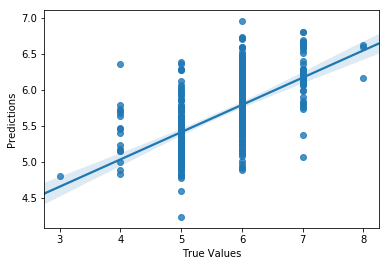

In [17]:
#plt.scatter(y_test, y_pred, fit_)
ax = sns.regplot(y_test, y_pred);
ax.set(xlabel = ("True Values"))
ax.set(ylabel = ("Predictions"))

### Ridge Regression 